In [1]:
import networkx as nx
import pandas as pd
import matplotlib.pyplot as plt
from operator import itemgetter


In [2]:
G = nx.Graph()

df = pd.read_csv("../data/processed/N1_N2_plus_sideroads.csv")

In [3]:
df.head()

,index,road,id,model_type,condition,name,lat,lon,length,bridge_name,in,out
0,0,N1,1000000,sourcesink,NaN,SoSi1,23.706028,90.443333,0.0,NaN,0.319244,0.28693
1,2,N1,1000002,link,NaN,NaN,23.702778,90.450472,1000.0,NaN,NaN,NaN
2,4,N1,1000004,bridge,A,NaN,23.698739,90.458861,11.3,bridge at id 1000004,NaN,NaN
3,7,N1,1000007,link,NaN,NaN,23.693833,90.469138,3175.0,NaN,NaN,NaN
4,10,N1,1000010,bridge,A,NaN,23.694664,90.487775,6.6,bridge at id 1000010,NaN,NaN


In [4]:
for i, row in df.iterrows():
    G.add_node(row['id'], pos=[row['lon'],row['lat']]) # add all nodes from id

# add edges between all nodes on a road. Intersections have the same id, so will be connected this way too.
p_row = None
for i, row in df.iterrows():
    if p_row is not None:
        if p_row['road'] == row['road']:
            G.add_edge(p_row['id'], row['id'], weight=row['length'])
    p_row = row

In [5]:
path_ids_dict = {}

def set_lat_lon_bound(lat_min, lat_max, lon_min, lon_max, edge_ratio=0.02):

    lat_edge = (lat_max - lat_min) * edge_ratio
    lon_edge = (lon_max - lon_min) * edge_ratio

    x_max = lon_max + lon_edge
    y_max = lat_min - lat_edge
    x_min = lon_min - lon_edge
    y_min = lat_max + lat_edge
    return y_min, y_max, x_min, x_max

In [6]:
# a list of names of roads to be generated
roads = df['road'].unique().tolist() 

df_objects_all = []

for road in roads:
    # Select all the objects on a particular road in the original order as in the cvs
    df_objects_on_road = df[df['road'] == road]

    if not df_objects_on_road.empty:
        df_objects_all.append(df_objects_on_road)

        """
        Set the path 
        1. get the serie of object IDs on a given road in the cvs in the original order
        2. add the (straight) path to the path_ids_dict
        3. put the path in reversed order and reindex
        4. add the path to the path_ids_dict so that the vehicles can drive backwards too
        """
        path_ids = df_objects_on_road['id']
        path_ids.reset_index(inplace=True, drop=True)
        path_ids_dict[path_ids[0], path_ids.iloc[-1]] = path_ids
        path_ids_dict[path_ids[0], None] = path_ids
        path_ids = path_ids[::-1]
        path_ids.reset_index(inplace=True, drop=True)
        path_ids_dict[path_ids[0], path_ids.iloc[-1]] = path_ids
        path_ids_dict[path_ids[0], None] = path_ids

# put back to df with selected roads so that min and max and be easily calculated
df = pd.concat(df_objects_all)
y_min, y_max, x_min, x_max = set_lat_lon_bound(
    df['lat'].min(),
    df['lat'].max(),
    df['lon'].min(),
    df['lon'].max(),
    0.05
)

In [7]:
pos = nx.get_node_attributes(G,'pos')

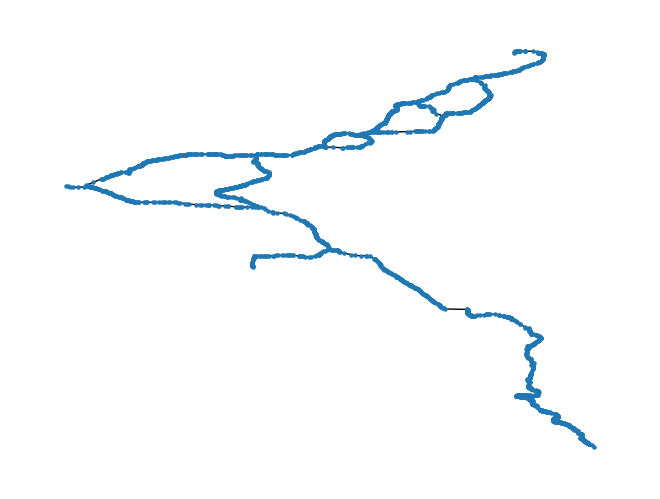

In [8]:
nx.draw(G, pos = pos, with_labels = False, node_size = 5)

In [9]:
for i in df.loc[df['model_type']=='sourcesink']['id']:
    print(i)

1000000
1001554
1001782
1001783
1001913
1002876


In [10]:
Betw_centr_1000000 = nx.betweenness_centrality_subset(G, [1000000], [1001554,1001782,1001783,1001913,1002876], normalized=True, weight=None)
Betw_centr_1001554 = nx.betweenness_centrality_subset(G, [1001554], [1000000,1001782,1001783,1001913,1002876], normalized=True, weight=None)
Betw_centr_1001782 = nx.betweenness_centrality_subset(G, [1001782], [1000000,1001554,1001783,1001913,1002876], normalized=True, weight=None)
Betw_centr_1001783 = nx.betweenness_centrality_subset(G, [1001783], [1000000,1001554,1001782,1001913,1002876], normalized=True, weight=None)
Betw_centr_1001913 = nx.betweenness_centrality_subset(G, [1001913], [1000000,1001554,1001782,1001783,1002876], normalized=True, weight=None)
Betw_centr_1002876 = nx.betweenness_centrality_subset(G, [1002876], [1000000,1001554,1001782,1001783,1001913], normalized=True, weight=None)

In [11]:
Betw_centr_1000000

{1000000: 0.0,
 1000002: 9.12751873879597e-07,
 1000004: 9.12751873879597e-07,
 1000007: 9.12751873879597e-07,
 1000010: 9.12751873879597e-07,
 1000013: 9.12751873879597e-07,
 1000017: 9.12751873879597e-07,
 1000018: 9.12751873879597e-07,
 1000019: 9.12751873879597e-07,
 1000020: 7.302014991036776e-07,
 1000021: 7.302014991036776e-07,
 1000022: 7.302014991036776e-07,
 1000023: 7.302014991036776e-07,
 1000024: 7.302014991036776e-07,
 1000025: 7.302014991036776e-07,
 1000026: 7.302014991036776e-07,
 1000028: 7.302014991036776e-07,
 1000029: 7.302014991036776e-07,
 1000030: 7.302014991036776e-07,
 1000031: 7.302014991036776e-07,
 1000033: 7.302014991036776e-07,
 1000034: 7.302014991036776e-07,
 1000035: 7.302014991036776e-07,
 1000036: 7.302014991036776e-07,
 1000038: 7.302014991036776e-07,
 1000040: 7.302014991036776e-07,
 1000042: 7.302014991036776e-07,
 1000045: 7.302014991036776e-07,
 1000047: 7.302014991036776e-07,
 1000049: 7.302014991036776e-07,
 1000050: 7.302014991036776e-07,
 10

In [12]:
bridges=[]
SSinks=[]
for i in df.loc[df['model_type']=='bridge']['id']:
    bridges.append(i)
for i in df.loc[df['model_type']=='sourcesink']['id']:
    SSinks.append(i)    

In [19]:
betCet=pd.DataFrame()
betweenness = nx.betweenness_centrality_subset(G, bridges,  [1000000,1001554,1001782,1001783,1001913,1002876], normalized=True, weight=None)


ValueError: cannot set a frame with no defined columns

In [20]:
betweenness

{1000000: 0.0,
 1000002: 0.00025684837730971863,
 1000004: 0.00025666582693494266,
 1000007: 0.0002575785788088223,
 1000010: 0.00025739602843404636,
 1000013: 0.000258308780307926,
 1000017: 0.00025812622993315006,
 1000018: 0.0002590389818070296,
 1000019: 0.0008718605899297911,
 1000020: 0.0007524726448263398,
 1000021: 0.000752107544076788,
 1000022: 0.0007524726448263398,
 1000023: 0.0007528377455758916,
 1000024: 0.0007535679470749953,
 1000025: 0.0007532028463254434,
 1000026: 0.0007539330478245472,
 1000028: 0.0007535679470749953,
 1000029: 0.0007539330478245472,
 1000030: 0.000754298148574099,
 1000031: 0.0007550283500732027,
 1000033: 0.0007546632493236508,
 1000034: 0.0007550283500732027,
 1000035: 0.0007557585515723063,
 1000036: 0.0007553934508227545,
 1000038: 0.0007561236523218581,
 1000040: 0.0007557585515723063,
 1000042: 0.0007564887530714101,
 1000045: 0.0007561236523218581,
 1000047: 0.0007568538538209619,
 1000049: 0.0007564887530714101,
 1000050: 0.000756853853820

In [27]:
betCet=betCet.from_dict([betweenness])

In [28]:
betCet.to_csv("../data/processed/BetweennessCentrality.csv", index=None)

In [31]:
betCet=betCet.transpose()

In [32]:
betCet.head()

,0
1000000,0.000000
1000002,0.000257
1000004,0.000257
1000007,0.000258
1000010,0.000257


In [37]:
betCet[0].sort_values()

1000000    0.000000
1001782    0.000000
1001783    0.000000
1001913    0.000000
1002876    0.000000
             ...   
1000199    0.000774
1000204    0.000774
1000019    0.000872
1000208    0.000934
1000374    0.000971
Name: 0, Length: 2342, dtype: float64